# **Membangun Model Neural Network (NN) Sederhana Menggunakan TensorFlow/Keras**

##### Nama       : Muhamad Habibi Budiman  
##### NIM        : 102022300226  
##### KODE       : 2506  

---

Pada tugas ini, Anda diminta untuk membangun **model Neural Network** (NN) yang sederhana menggunakan **TensorFlow/Keras** untuk melakukan klasifikasi pada dataset **MNIST**. Tugas ini melibatkan:

1. **Pembuatan Model NN**: Membuat arsitektur model neural network dengan menggunakan TensorFlow/Keras.
2. **Klasifikasi Data MNIST**: Melatih model untuk mengenali angka-angka dari dataset MNIST yang berisi gambar tulisan tangan angka 0-9.
3. **Evaluasi dan Analisis**: Mengevaluasi hasil model dan menganalisis kinerjanya pada data uji (test data).

#### Tujuan

- Membuat model neural network menggunakan **TensorFlow/Keras** untuk mengklasifikasikan gambar.
- Menggunakan **Neural Networks (NN)** untuk meningkatkan akurasi dalam pengenalan gambar, khususnya pada dataset seperti MNIST (gambar digit 28x28).
- Mengoptimalkan model dengan teknik **regularisasi** untuk menghindari **overfitting**, termasuk menggunakan **Dropout** dan **regularisasi L2**.
- Membuat model yang lebih efisien dengan **menggunakan lapisan tersembunyi** yang lebih kecil (128 neuron dan 64 neuron) serta **lapisan output** yang mengklasifikasikan gambar menjadi 10 kelas (misalnya, digit 0-9).
- **Meningkatkan generalisasi model** sehingga dapat mengenali gambar baru (belum terlihat) dengan baik tanpa kehilangan akurasi pada data pelatihan.
- Membandingkan apakah lebih baik menggunakan **momentum** atau tidak 


---

### Library yang Digunakan

Sebelum membangun model, kita perlu mengimpor beberapa **library** penting:

- **TensorFlow** dan **Keras** untuk membangun dan melatih model neural network.
- **Matplotlib** untuk visualisasi gambar dataset MNIST.

Berikut adalah kode untuk mengimpor library yang diperlukan:

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

### Memuat Dataset MNIST


Untuk memulai, saya akan memuat dataset **MNIST** yang berisi gambar angka tulisan tangan. Dataset ini akan dibagi menjadi dua bagian: **data Train** dan **data Test**. Berikut adalah kode untuk memuat dataset MNIST:

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Normalisasi Data

Setelah memuat dataset, kita akan **normalisasi data** dengan membagi nilai piksel gambar dengan **255.0**, sehingga rentang nilai piksel menjadi **0 hingga 1**.

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

 Pembagian nilai piksel dengan 255.0 dilakukan karena nilai piksel gambar digital biasanya berada dalam rentang 0 hingga 255. Dengan membaginya, membuatnya lebih mudah diproses oleh model. Jika menggunakan angka lain, seperti 100, representasi gambar akan menjadi kurang akurat, dan pelatihan model bisa jadi kurang efektif. 255 merupakan angka standar karena mencerminkan nilai maksimum dalam format gambar digital.

### Reshaping Dataset untuk Dimensi yang Dibutuhkan Model

Pada bagian ini, kita mengubah **dimensi** dataset gambar agar sesuai dengan input yang diperlukan oleh model neural network. Gambar-gambar dari dataset MNIST memiliki dimensi 28x28 piksel, dan kita perlu mengubahnya menjadi **4D tensor** dengan bentuk `(jumlah gambar, tinggi, lebar, jumlah saluran)`.

- **Dimensi Awal**              : Dataset gambar MNIST memiliki dimensi `(jumlah gambar, 28, 28)`, yaitu dua dimensi untuk gambar 28x28 piksel.
- **Dimensi Setelah Reshape**   : Model CNN membutuhkan input dengan dimensi `(jumlah gambar, tinggi, lebar, jumlah saluran)`. Karena dataset MNIST adalah gambar **grayscale** (hitam-putih), kita menambahkan dimensi saluran dengan nilai 1.

In [21]:
# Reshape dataset untuk dimensi yang dibutuhkan model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

### Pembuatan Model

#### Perbandingan Menggunakan Momentum VS Tidak Menggunakan Momentum

##### Tidak menggunakan momentum (Adam)

In [ ]:
model_no_momentum = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.6),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)), ## 
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax') #klasifikasi 10 kelas
])



- **Input Layer (Flatten)** digunakan untuk meratakan gambar 28x28 piksel menjadi vektor 1D. Ini memungkinkan model untuk memproses data gambar dalam bentuk yang dapat dipahami oleh lapisan-lapisan berikutnya.

- **Hidden Layer 1 (Dense)** dengan 128 neuron dan fungsi aktivasi **ReLU** digunakan untuk memperkenalkan non-linearitas dan mempercepat pelatihan. Fungsi ReLU membantu model mempelajari pola yang lebih kompleks dan menangani masalah vanishing gradient yang sering muncul pada fungsi aktivasi lain seperti sigmoid.

- **Dropout Layer** dengan tingkat 20% neuron dihilangkan secara acak selama pelatihan. Ini mencegah **overfitting** dengan cara membuat model tidak terlalu bergantung pada neuron tertentu dan meningkatkan kemampuannya untuk menggeneralisasi data yang belum terlihat.

- **Hidden Layer 2 (Dense)** dengan 64 neuron dan fungsi aktivasi **ReLU** berfungsi untuk menangani pola yang lebih dalam dan lebih kompleks. Seperti pada layer pertama, penggunaan ReLU membantu model belajar lebih efektif.

- **Output Layer (Dense)** dengan 10 neuron dan fungsi aktivasi **Softmax** menghasilkan probabilitas untuk setiap kelas, sehingga model dapat memilih kelas yang paling mungkin (misalnya untuk klasifikasi angka 0-9 pada dataset MNIST).


In [23]:
model_no_momentum.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model ini dikompilasi dengan pengaturan berikut:

1. **Optimizer: 'adam'**  
   Adam (Adaptive Moment Estimation) adalah algoritma optimasi yang menyesuaikan tingkat pembelajaran secara otomatis untuk setiap parameter, meningkatkan efisiensi pelatihan dan konvergensi yang lebih cepat.

2. **Loss Function: 'sparse_categorical_crossentropy'**  
   Digunakan untuk klasifikasi multi-kelas di mana label diberikan dalam bentuk angka integer bukan one-hot encoding. Fungsi ini mengukur seberapa besar perbedaan antara prediksi model dan label yang benar.

3. **Metrics: 'accuracy'**  
   Akurasi mengukur proporsi prediksi yang benar dibandingkan dengan total data, memberikan gambaran seberapa baik model dalam mengklasifikasikan data.

Dengan konfigurasi ini, model dilatih menggunakan **Adam** untuk optimasi, **sparse categorical crossentropy** untuk menghitung loss, dan **akurasi** untuk menilai kinerja model selama pelatihan.


In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_no_momentum.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels), callbacks=[early_stopping])
## epoch 20 - 30 bisa nya untuk trail nya 


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8777 - loss: 0.9764 - val_accuracy: 0.9227 - val_loss: 0.5517
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9138 - loss: 0.5598 - val_accuracy: 0.9347 - val_loss: 0.4789
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9233 - loss: 0.5049 - val_accuracy: 0.9435 - val_loss: 0.4361
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9275 - loss: 0.4746 - val_accuracy: 0.9379 - val_loss: 0.4313
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9291 - loss: 0.4544 - val_accuracy: 0.9486 - val_loss: 0.3986


Model ini dilatih dengan pengaturan berikut:

1. **EarlyStopping**  
   **EarlyStopping** digunakan untuk menghentikan pelatihan model lebih awal jika model tidak menunjukkan perbaikan pada **validation loss** (kesalahan pada data validasi) setelah beberapa epoch. Ini membantu agar model tidak **overfitting** atau terlalu lama dilatih.
   - **monitor='val_loss'**: Memantau apakah **validation loss** membaik (menurun) selama pelatihan.
   - **patience=3**: Jika **validation loss** tidak membaik dalam 3 epoch berturut-turut, pelatihan akan dihentikan.
   - **restore_best_weights=True**: Jika pelatihan dihentikan lebih awal, model akan kembali ke bobot terbaik yang tercatat saat **validation loss** paling rendah.

2. **Model Training (`model_no_momentum.fit`)**  
   - **train_images, train_labels**: Data gambar dan label yang digunakan untuk melatih model.
   - **epochs=5**: Model akan dilatih selama 5 putaran (epoch).
   - **batch_size=64**: Model akan memproses 64 gambar sekaligus sebelum memperbarui bobotnya.
   - **validation_data=(test_images, test_labels)**: Data validasi yang digunakan untuk menguji kinerja model selama pelatihan.
   - **callbacks=[early_stopping]**: Menggunakan **EarlyStopping** untuk menghentikan pelatihan lebih awal jika diperlukan.

Dengan **EarlyStopping**, pelatihan akan dihentikan jika model sudah tidak menunjukkan perbaikan lagi pada data validasi, sehingga model tidak akan berisiko **overfitting**.


In [25]:
# evalusasi tidak menggunakan momentum
test_loss, test_acc = model_no_momentum.evaluate(test_images, test_labels, verbose=2)
test_acc_percent = test_acc * 100

print(f"Test accuracy: {test_acc_percent:.2f}%")
print(f"Test loss: {test_loss:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9486 - loss: 0.3986
Test accuracy: 94.86%
Test loss: 0.3986


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9330 - loss: 0.4350 - val_accuracy: 0.9458 - val_loss: 0.3890
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9356 - loss: 0.4201 - val_accuracy: 0.9518 - val_loss: 0.3632
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9367 - loss: 0.4080 - val_accuracy: 0.9521 - val_loss: 0.3472
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9373 - loss: 0.4019 - val_accuracy: 0.9591 - val_loss: 0.3443
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9397 - loss: 0.3902 - val_accuracy: 0.9496 - val_loss: 0.3550
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9399 - loss: 0.3855 - val_accuracy: 0.9537 - val_loss: 0.3456
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9420 - loss: 0.3821 - val_accuracy: 0.9488 - val_loss: 0.3363
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9406 - loss: 0.3759 - val_accuracy: 0.

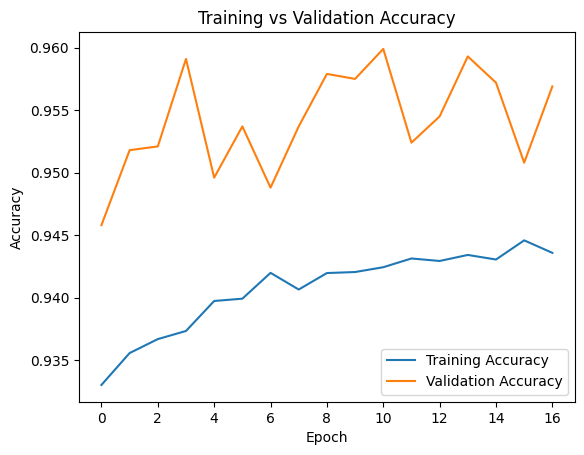

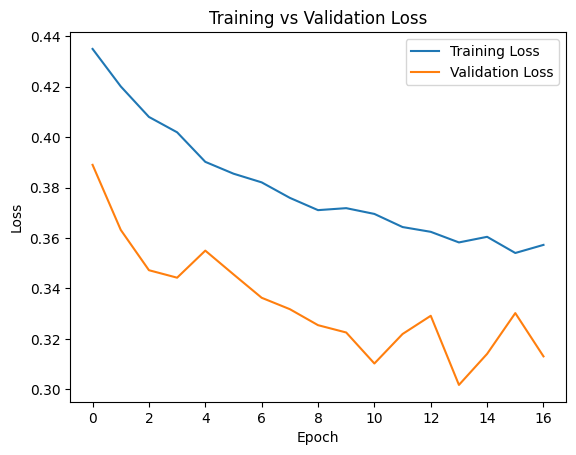

In [26]:
# Melatih model dan menyimpan riwayat pelatihan
history_adam = model_no_momentum.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels), callbacks=[early_stopping])

# Memplot akurasi pelatihan dan validasi
plt.plot(history_adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Memplot loss pelatihan dan validasi
plt.plot(history_adam.history['loss'], label='Training Loss')
plt.plot(history_adam.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

 **Kesimpulan untuk Model Tanpa Momentum:**

- **Akurasi Validasi**: **Akurasi validasi** pada model tanpa momentum menunjukkan fluktuasi yang lebih besar. Meskipun ada peningkatan, akurasi cenderung naik turun selama pelatihan, yang mengindikasikan bahwa model kesulitan menggeneralisasi dengan baik pada data validasi.

- **Loss Validasi**: **Loss validasi** mengalami fluktuasi yang lebih besar dibandingkan loss pelatihan. Penurunan loss validasi tidak konsisten, menunjukkan bahwa model tidak cukup stabil dalam meminimalkan kesalahan prediksi pada data validasi.

- **Akurasi Pelatihan**: **Akurasi pelatihan** meningkat secara konsisten, namun cenderung menunjukkan beberapa lonjakan, yang mengindikasikan adanya overfitting pada data pelatihan, di mana model lebih menyesuaikan diri dengan data yang sudah dilatih dan tidak cukup menggeneralisasi.

- **Loss Pelatihan**: **Loss pelatihan** menurun secara stabil, tetapi karena fluktuasi besar pada **loss validasi**, ini menunjukkan model lebih fokus pada penurunan kesalahan pada data pelatihan daripada belajar dari data yang belum dilihat.



##### Menggunakan momentum (SGD)

In [27]:
model_with_momentum = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])

In [28]:
#optimizer = SGD(learning_rate=0.01, momentum=0.90)
optimizer = SGD(learning_rate=0.005, momentum=0.9)

Perubahan **learning_rate dari 0.01 menjadi 0.005** dilakukan untuk memperlambat pembaruan bobot dan mencegah model dari overshooting atau fluktuasi besar dalam pembaruan, sehingga pelatihan menjadi lebih stabil dan lebih terkendali.

In [29]:
model_with_momentum.compile(optimizer=optimizer, 
                            loss='sparse_categorical_crossentropy', 
                            metrics=['accuracy'])

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_with_momentum.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8299 - loss: 2.1492 - val_accuracy: 0.9220 - val_loss: 0.9734
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9069 - loss: 0.7637 - val_accuracy: 0.9310 - val_loss: 0.5457
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9172 - loss: 0.5453 - val_accuracy: 0.9376 - val_loss: 0.4514
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9239 - loss: 0.4879 - val_accuracy: 0.9430 - val_loss: 0.4192
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9280 - loss: 0.4610 - val_accuracy: 0.9429 - val_loss: 0.4025


In [31]:
# Mengevaluasi model
test_loss, test_acc = model_with_momentum.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss: {test_loss:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9429 - loss: 0.4025
Test accuracy: 94.29%
Test loss: 0.4025


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9320 - loss: 0.4430 - val_accuracy: 0.9464 - val_loss: 0.3861
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9341 - loss: 0.4272 - val_accuracy: 0.9499 - val_loss: 0.3670
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9362 - loss: 0.4163 - val_accuracy: 0.9519 - val_loss: 0.3653
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9389 - loss: 0.4073 - val_accuracy: 0.9532 - val_loss: 0.3549
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9400 - loss: 0.4009 - val_accuracy: 0.9541 - val_loss: 0.3485
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9390 - loss: 0.3929 - val_accuracy: 0.9554 - val_loss: 0.3419
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9416 - loss: 0.3862 - val_accuracy: 0.9514 - val_loss: 0.3462
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9405 - loss: 0.3840 - val_accuracy: 0.

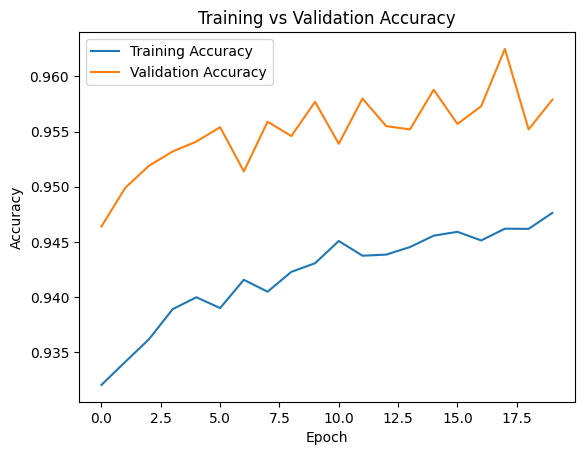

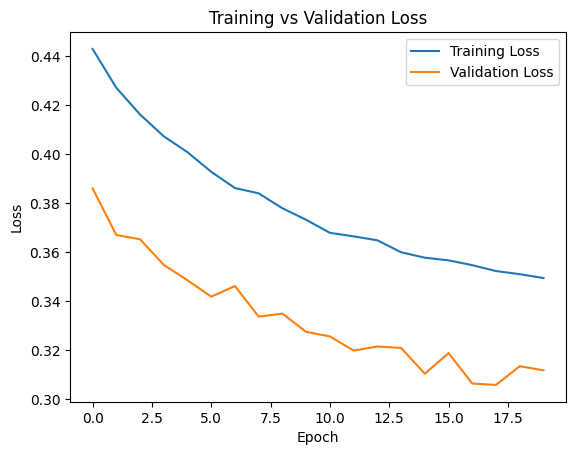

In [32]:
# Melatih model dan menyimpan riwayat pelatihan
history_sgd = model_with_momentum.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels), callbacks=[early_stopping])

# Memplot akurasi pelatihan dan validasi
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Memplot loss pelatihan dan validasi
plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Kesimpulan untuk Model dengan Momentum (SGD):**

- **Akurasi Validasi**: Dengan menggunakan **SGD dengan momentum**, **akurasi validasi** meningkat lebih stabil dan halus. Tidak ada lonjakan atau penurunan tajam, yang mengindikasikan bahwa momentum membantu model untuk lebih konsisten dalam belajar dari data validasi.

- **Loss Validasi**: **Loss validasi** turun dengan lebih stabil. Momentum membantu model untuk tetap fokus pada penurunan kesalahan pada data validasi dan menghindari fluktuasi besar.

- **Akurasi Pelatihan**: **Akurasi pelatihan** juga meningkat dengan stabil tanpa lonjakan yang tiba-tiba, menunjukkan bahwa momentum membantu model untuk tetap terfokus dan mencegah model terlalu menyesuaikan diri dengan data pelatihan.

- **Loss Pelatihan**: **Loss pelatihan** menurun secara konsisten, yang berarti model lebih efisien dalam meminimalkan kesalahan pada data pelatihan dan validasi.



---

### visualisasi hasil Prediksi 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


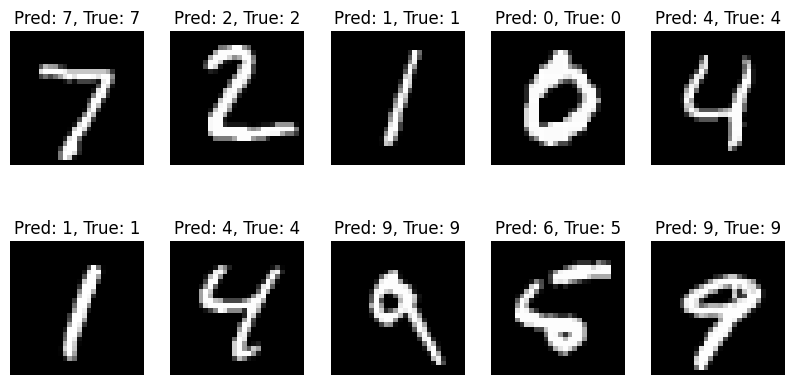

In [33]:

predictions = model_with_momentum.predict(test_images)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = predictions[i].argmax()
    true_label = test_labels[i]
    ax.set_title(f"Pred: {pred_label}, True: {true_label}")
    ax.axis('off')

plt.show()


### kesimpulan

**Kesimpulan Akhir**:
Penggunaan **momentum (SGD)** memberikan **stabilitas** yang lebih baik dalam pelatihan dan meningkatkan kemampuan model untuk **menggeneralisasi** pada data validasi. Sementara itu, model **tanpa momentum** menunjukkan fluktuasi yang lebih besar dan rentan terhadap overfitting. Dengan momentum, model dapat menghindari fluktuasi besar dalam **akurasi** dan **loss**, yang menghasilkan performa yang lebih stabil dan efisien.